# TUTORIAL: REGRESIÓN LOGÍSTICA EN SCIKIT-LEARN

La Regresión Logística es un algoritmo/modelo clásico del Machine Learning y que sorprendentemente puede ser usado incluso en tareas tan complejas como la clasificación de texto o imágenes.

Además, esta Regresión Logística es en esencia una Neurona Artificial, que es la base de las Redes Neuronales actuales.

Así que en este tutorial veremos cómo implementar un modelo de Regresión Logística en Scikit-Learn para resolver una tarea de clasificación.

Contenido:
1. Breve repaso: ¿Qué es la Regresión Logística?
2. El problema a resolver y el set de datos
3. Exploración de los datos y sets de entrenamiento y prueba
4. Creación y entrenamiento del modelo con Scikit-Learn
5. Características del modelo entrenado
6. La frontera de decisión
7. Desempeño del modelo

## 1. Breve repaso: ¿Qué es la Regresión Logística?

> Es un algoritmo/modelo de clasificación **binaria** que predice la probabilidad de que un dato numérico pertenezca a una de dos posibles categorías

![](https://drive.google.com/uc?export=view&id=11Kb65J1BqDzTWIFZhPbh3NNL_bXak73D)

Si la entrada al modelo es un dato con "n" **variables predictoras** o **características** ($x_1$, $x_2$, ..., $x_n$), entonces el modelo obtiene una predicción en dos pasos:

1. Primero **transforma** el dato de entrada de "n" dimensiones a una sola:

$$\text{z} = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n + b$$

donde $(w_1, w_2, ..., w_n, b)$ son los **parámetros del modelo** que se aprenden de forma automática durante el entrenamiento

2. La transformación se lleva a una **función de activación sigmoidal** que arroja una probabilidad:

$$y_{pred} = \frac{1}{1+e^{-z}}$$

Así:

- Si $y_{pred} < 0.5$ la categoría asignada es "0"
- Mientras que si $y_{pred} >= 0.5$ la categoría asignada es "1"

¡Y esto es precisamente una Neurona Artificial!

## 2. El problema a resolver y el set de datos

> La idea es crear, entrenar y medir el desempeño de un clasificador binario para determinar si existe **riesgo** o no de que una persona no pague un crédito a tiempo con base en sus **ingresos** y en la **relación entre el nivel de deuda y sus ingresos**

Para ello usaremos un set de datos que contiene precisamente estas variables:

In [1]:
# leer dataset
import pandas as pd

df = pd.read_csv('riesgo_crediticio.csv')
df

,ingresos,ind_deuda_ing,riesgo
0,4.37,0.18,alto
1,9.56,0.82,bajo
2,7.59,0.50,bajo
3,6.39,0.76,bajo
4,2.40,0.36,alto
...,...,...,...
395,9.38,0.80,bajo
396,8.73,0.85,alto
397,4.86,0.55,bajo
398,7.76,0.66,bajo


Este set de datos contiene un total de 400 registros. Por cada registro tendremos:

- "ingresos": el nivel de ingresos mensuales de la persona (en miles de dólares). **Variable predictora**
- "ind_deuda_ing": índice que mide la relación entre el nivel de deuda y el nivel de ingreso. Un índice es cercano a 1 indica que la persona dedicará buena parte de sus ingresos al pago de deudas (lo cual no es bueno). **Variable predictora**.
- "riesgo": el nivel de riesgo ("alto" o "bajo") de que la persona no pague a tiempo sus deudas. **Variable a predecir**

## 3. Exploración de los datos y sets de entrenamiento y prueba

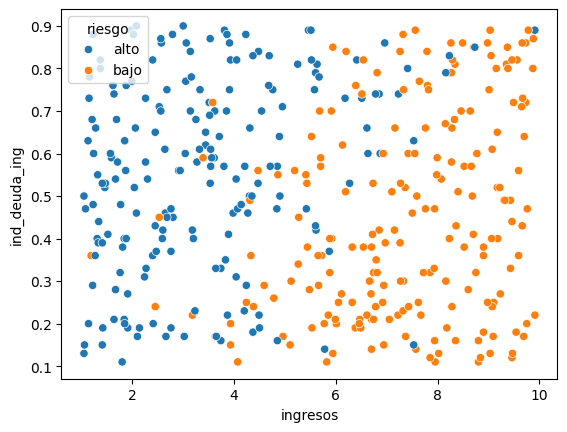

In [2]:
# Graficar
import seaborn as sns
sns.scatterplot(data=df, x='ingresos', y='ind_deuda_ing', hue='riesgo');

In [3]:
# Conteo categorías
df['riesgo'].value_counts()

,count
riesgo,
bajo,208
alto,192


Breve exploración:

- Los datos están prácticamente balanceados
- La tendencia es: más ingresos -> menos riesgo y menos ingresos -> más riesgo

Veamos esto en detalle

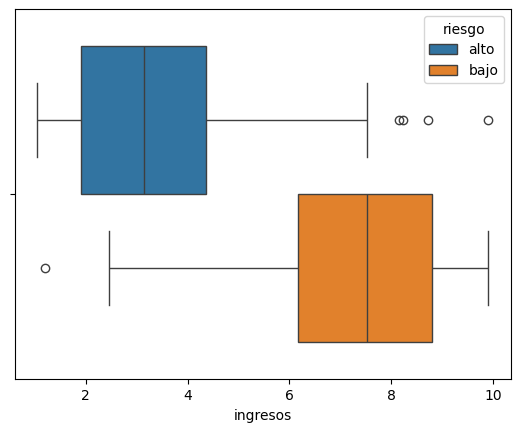

In [4]:
sns.boxplot(data=df, x='ingresos', hue='riesgo');

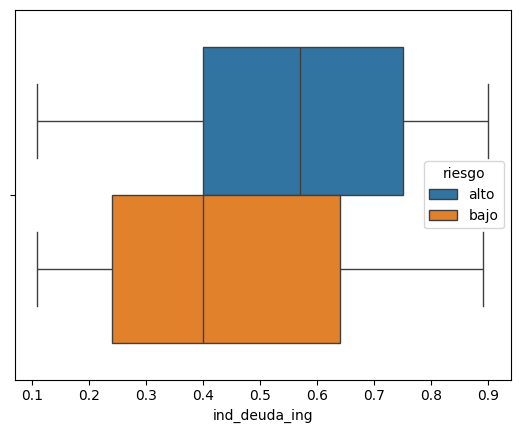

In [5]:
sns.boxplot(data=df, x='ind_deuda_ing', hue='riesgo');

In [6]:
# Arreglos X (entradas), y (variable a predecir)
X = df[['ingresos', 'ind_deuda_ing']].to_numpy() # 400x2
y = df['riesgo'].to_numpy() # 400

print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [7]:
# Crear particiones entrenamiento/prueba
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_tr.shape, y_tr.shape)
print(X_ts.shape, y_ts.shape)

(320, 2) (320,)
(80, 2) (80,)


## 4. Creación y entrenamiento del modelo con Scikit-Learn

In [12]:
# Crear y entrenar modelo
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression() # Instancia
modelo.fit(X_tr, y_tr)

LogisticRegression()

## 5. Características del modelo entrenado

In [13]:
print("b (bias):", modelo.intercept_)
print("Parámetros (ws):", modelo.coef_)

b (bias): [-4.31005995]
Parámetros (ws): [[ 1.05999123 -2.62375687]]


$z = 1.05 \cdot \text{ingresos} + -2.62 \cdot \text{ind_deuda_ing} -4.31$

Veamos por ejemplo las probabilidades predichas por el modelo:

In [14]:
print(modelo.classes_)
modelo.predict_proba(X_ts)

['alto' 'bajo']


array([[0.96827845, 0.03172155],
       [0.0365217 , 0.9634783 ],
       [0.00482081, 0.99517919],
       [0.1617588 , 0.8382412 ],
       [0.19047175, 0.80952825],
       [0.85540455, 0.14459545],
       [0.8160411 , 0.1839589 ],
       [0.05349922, 0.94650078],
       [0.06856468, 0.93143532],
       [0.03157665, 0.96842335],
       [0.04495756, 0.95504244],
       [0.12250003, 0.87749997],
       [0.93647498, 0.06352502],
       [0.97175418, 0.02824582],
       [0.9886448 , 0.0113552 ],
       [0.98149388, 0.01850612],
       [0.24228919, 0.75771081],
       [0.01677064, 0.98322936],
       [0.64802953, 0.35197047],
       [0.09656833, 0.90343167],
       [0.98123288, 0.01876712],
       [0.93749772, 0.06250228],
       [0.6927575 , 0.3072425 ],
       [0.08900971, 0.91099029],
       [0.53747323, 0.46252677],
       [0.06218318, 0.93781682],
       [0.08131929, 0.91868071],
       [0.8773521 , 0.1226479 ],
       [0.96881869, 0.03118131],
       [0.02401854, 0.97598146],
       [0.

Si queremos predecir las categorías usamos el método "predict":

In [15]:
modelo.predict(X_ts)

array(['alto', 'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'bajo',
       'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto',
       'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'bajo', 'bajo', 'bajo',
       'bajo', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto',
       'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto',
       'alto', 'alto', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto',
       'bajo', 'alto', 'bajo', 'alto', 'alto', 'bajo', 'alto', 'bajo',
       'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'bajo'],
      dtype=object)

## 6. La frontera de decisión

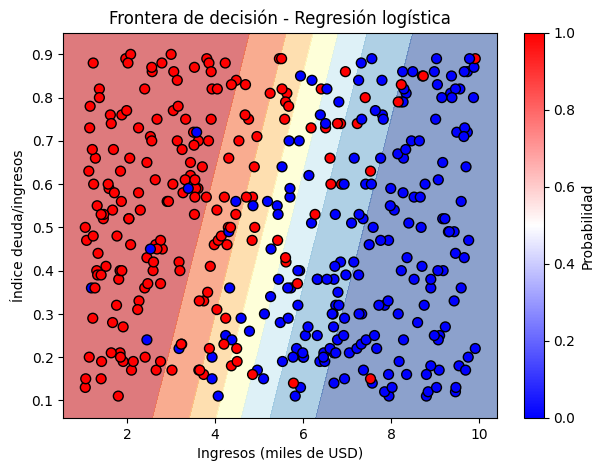

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Crear grilla de valores
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 # "ingresos"
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05 # "ind_deuda_ing"
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

# Predecir probabilidades con "predict_proba"
Z = modelo.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape) # Probabilidades

# Dibujar el set de datos y la frontera de decisión
y_num = df["riesgo"].map({"alto": 1, "bajo": 0}).values
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, cmap="RdYlBu", alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y_num, cmap="bwr", edgecolor="k", s=50)
plt.colorbar(label="Probabilidad")
plt.xlabel("Ingresos (miles de USD)")
plt.ylabel("Índice deuda/ingresos")
plt.title("Frontera de decisión - Regresión logística");

## 7. Desempeño del modelo

Usaremos la exactitud para medir este desempeño:

In [17]:
from sklearn.metrics import accuracy_score

y_pred_tr = modelo.predict(X_tr)
y_pred_ts = modelo.predict(X_ts)
print("Exactitud entrenamiento:", accuracy_score(y_tr, y_pred_tr))
print("Exactitud prueba:", accuracy_score(y_ts, y_pred_ts))

Exactitud entrenamiento: 0.884375
Exactitud prueba: 0.875
